In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('wine_fraud.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [7]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [9]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

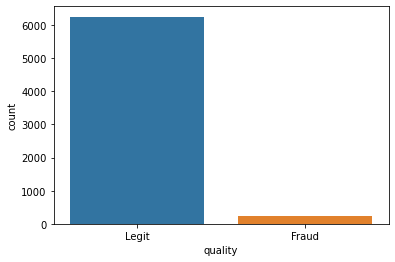

In [8]:
sns.countplot(x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='count'>

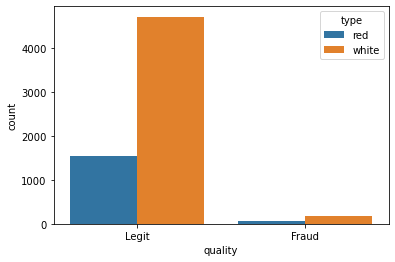

In [11]:
sns.countplot(x='quality', data=df, hue='type')

In [13]:
reds = df[df['type'] == 'red']

In [14]:
whites = df[df['type'] == 'white']

In [19]:
100*len(reds[reds['quality'] == 'Fraud'])/len(reds)

3.9399624765478425

In [21]:
100*len(whites[whites['quality'] == 'Fraud'])/len(whites)

3.736218864842793

In [22]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

<AxesSubplot:>

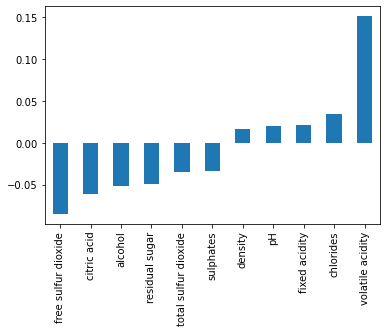

In [27]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

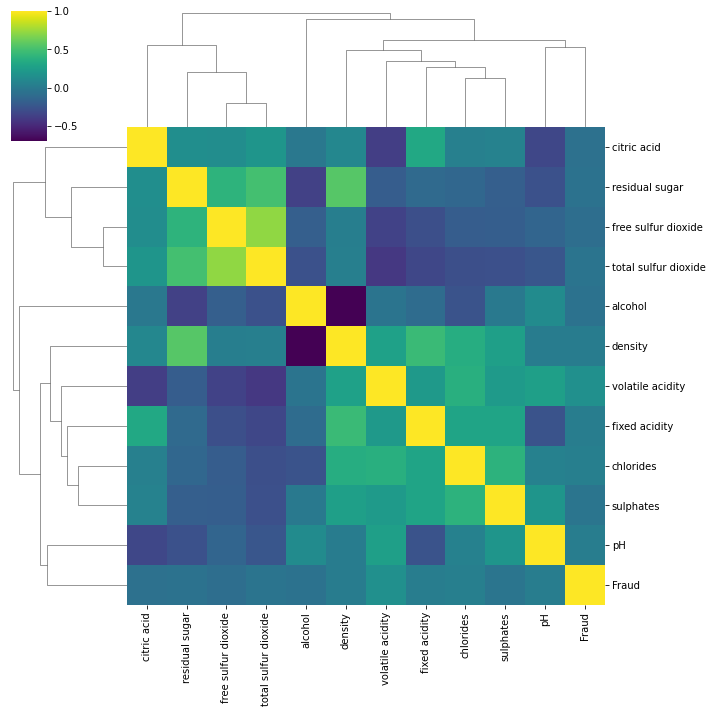

In [28]:
sns.clustermap(df.corr(), cmap='viridis')

In [29]:
#df= df.drop('Fraud',axis=1)

In [31]:
#df

In [32]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [33]:
X = df.drop('quality', axis=1)

In [34]:
y = df['quality']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaled_X_train = scaler.fit_transform(X_train)

In [40]:
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(class_weight='balanced')

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1]}

In [45]:
grid = GridSearchCV(svc, param_grid)

In [48]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [49]:
grid.best_params_

{'C': 1}

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [54]:
grid_preds = grid.predict(scaled_X_test)

In [55]:
confusion_matrix(y_test, grid_preds)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

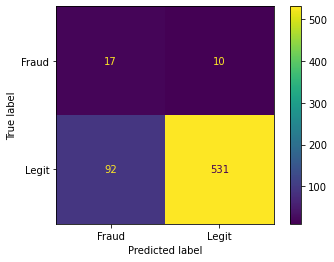

In [56]:
plot_confusion_matrix(grid, scaled_X_test, y_test)